In [3]:
import mysql.connector
from PIL import Image
import io
import matplotlib.pyplot as plt

def display_item_photo(item_id):
    try:
        connection = mysql.connector.connect(
            host="localhost",
            user="welcomehomeadmin",
            password="1234",
            database="WelcomeHomeDB"
        )
        
        cursor = connection.cursor(prepared=True)
        cursor.execute("SELECT photo FROM Item WHERE ItemID = ?", (item_id,))
        photo_data = cursor.fetchone()[0]
        
        if photo_data:
            # Convert blob to image
            image = Image.open(io.BytesIO(photo_data))
            
            # Display using matplotlib
            plt.figure(figsize=(10, 10))
            plt.imshow(image)
            plt.axis('off')  # Hide axes
            plt.show()
        else:
            print("No photo found for this item")
            
    except mysql.connector.Error as error:
        print(f"Failed to read photo: {error}")
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()

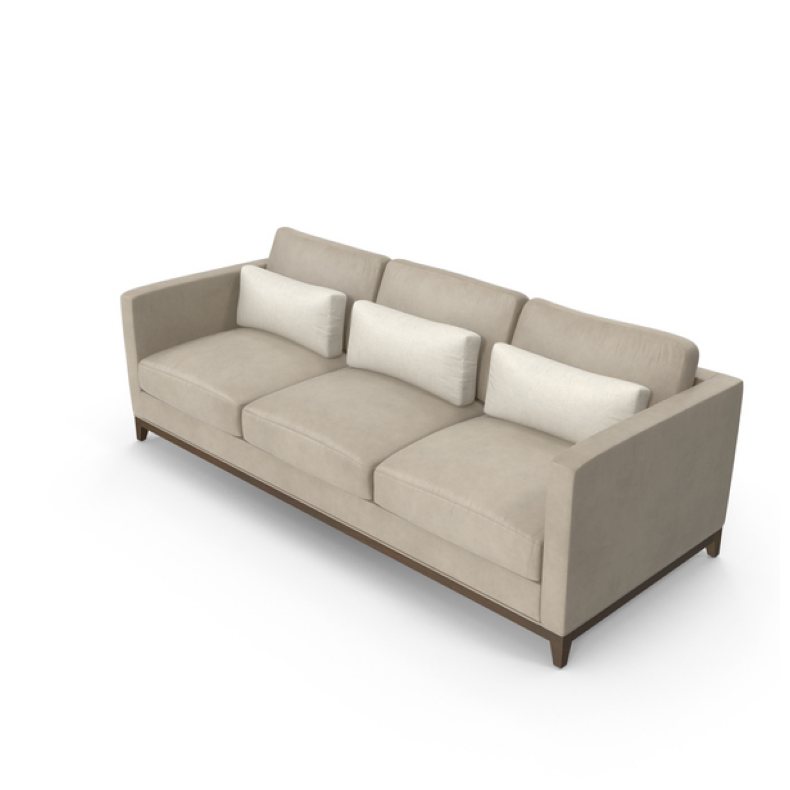

In [4]:
display_item_photo(item_id=1)

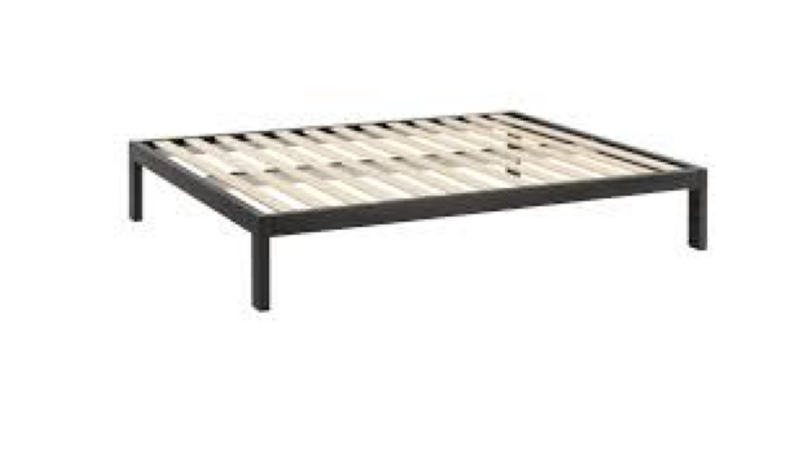

In [5]:
display_item_photo(item_id=2)

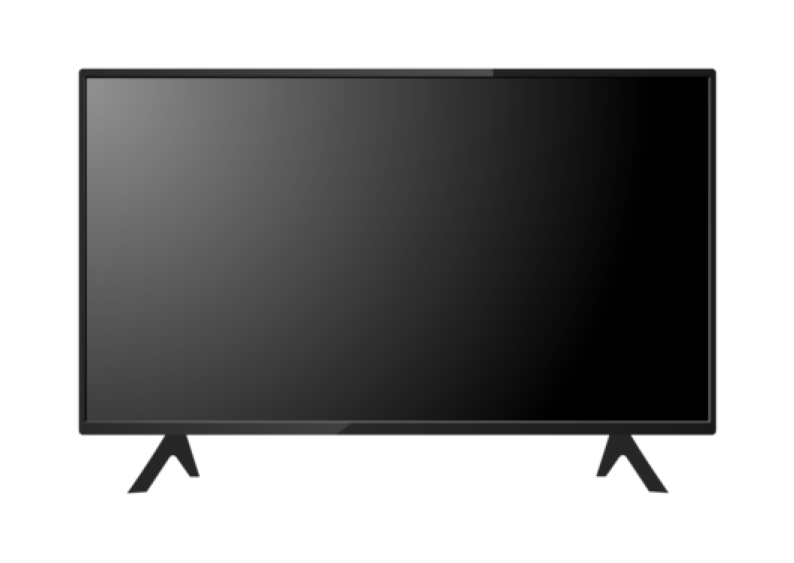

In [6]:
display_item_photo(item_id=3)

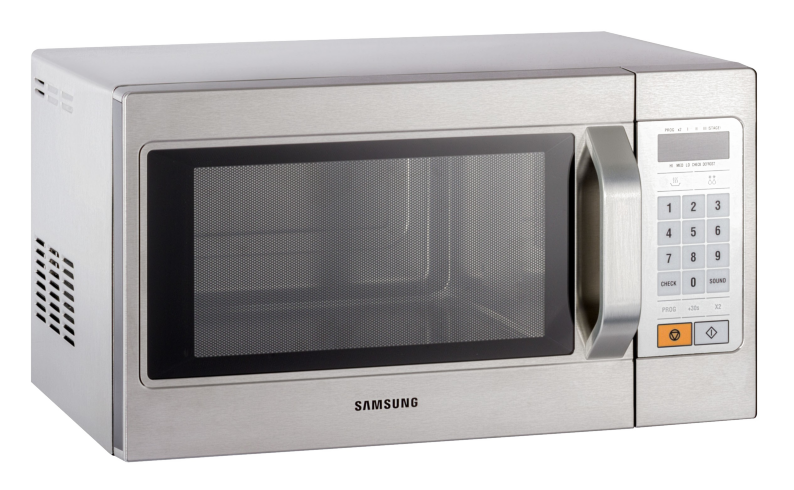

In [7]:
display_item_photo(item_id=4)

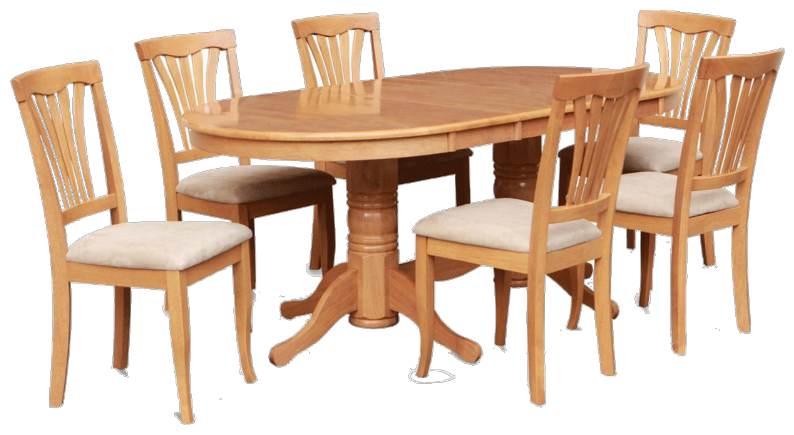

In [8]:
display_item_photo(item_id=5)